In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-aviation-hub-dataset-of-airports-worldwide/airports .csv


In [2]:
# import the dataset
df = pd.read_csv('/kaggle/input/global-aviation-hub-dataset-of-airports-worldwide/airports .csv')

In [3]:
#show the top 5 records
df.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [4]:
df = pd.read_csv('/kaggle/input/global-aviation-hub-dataset-of-airports-worldwide/airports .csv',usecols=['id','type','name','latitude_deg','longitude_deg','elevation_ft','continent','iso_country','iso_region','municipality','scheduled_service','gps_code'])
                 

In [5]:
# Lets check Top 5 Records
df.head()

,id,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code
0,6523,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A
1,323361,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA
2,6524,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK
3,6525,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL
4,506791,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN


In [6]:
# Rename the Columns to Proper Format
df.rename(columns={'type':'Airport_type','name':'Name','latitude_deg':'Latitude','longitude_deg':'Longitude','elevation_ft':'Elevation','continent':'Continent','iso_country':'Country','iso_region':'Region','municipality':'Municipality','scheduled_service':'Scheduled_service','gps_code':'Gps_code'},inplace=True)

In [7]:
# shape of dataset
df.shape

(76367, 12)

# Data checks to perforn

In [8]:
# Check Missing Values
df.isna().sum()

id                       0
Airport_type             0
Name                     0
Latitude                 0
Longitude                0
Elevation            14398
Continent            36995
Country                259
Region                   0
Municipality          5050
Scheduled_service        0
Gps_code             35022
dtype: int64

In [9]:
# check Duplicates

df.duplicated().sum()


0

In [10]:
# check Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76367 entries, 0 to 76366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76367 non-null  int64  
 1   Airport_type       76367 non-null  object 
 2   Name               76367 non-null  object 
 3   Latitude           76367 non-null  float64
 4   Longitude          76367 non-null  float64
 5   Elevation          61969 non-null  float64
 6   Continent          39372 non-null  object 
 7   Country            76108 non-null  object 
 8   Region             76367 non-null  object 
 9   Municipality       71317 non-null  object 
 10  Scheduled_service  76367 non-null  object 
 11  Gps_code           41345 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 7.0+ MB


In [11]:
# check the number of unique values of each column
df.nunique()

id                   76367
Airport_type             7
Name                 72238
Latitude             75149
Longitude            75424
Elevation             6231
Continent                6
Country                244
Region                2891
Municipality         34144
Scheduled_service        2
Gps_code             41345
dtype: int64

In [12]:
# check statistics of numerical data
df.describe(exclude='O')

,id,Latitude,Longitude,Elevation
count,76367.000000,76367.000000,76367.000000,61969.000000
mean,162836.653018,25.695102,-28.898201,1302.989947
std,165653.756787,26.234692,86.149633,1672.216777
min,2.000000,-90.000000,-179.876999,-1266.000000
25%,19241.000000,11.990227,-94.065952,207.000000
50%,40902.000000,35.133200,-69.794040,730.000000
75%,335614.500000,42.670806,23.845099,1617.000000
max,512065.000000,82.750000,179.975700,17372.000000


In [13]:
# check statistics of Categorical data
df.describe(include='O')

,Airport_type,Name,Continent,Country,Region,Municipality,Scheduled_service,Gps_code
count,76367,76367,39372,76108,76367,71317,76367,41345
unique,7,72238,6,244,2891,34144,2,41345
top,small_airport,Centre Hospitalier Heliport,AS,US,US-TX,Osaka,no,K00A
freq,39738,83,11060,30581,3659,419,72103,1


In [14]:
# define numerical columns 
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']

#print columns
print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))

We have 4 numerical features : ['id', 'Latitude', 'Longitude', 'Elevation']


In [15]:
# define Categorical columns 
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

#print columns
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 8 categorical features : ['Airport_type', 'Name', 'Continent', 'Country', 'Region', 'Municipality', 'Scheduled_service', 'Gps_code']


In [16]:
# Missing Values in Numerical Columns
df[numerical_features].isna().sum()

id               0
Latitude         0
Longitude        0
Elevation    14398
dtype: int64

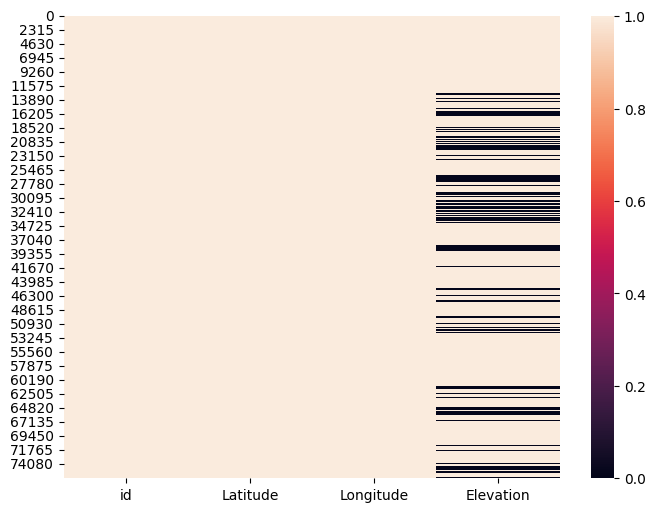

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_features].notna())
plt.show()

In [18]:
# Missing Values in Categorical Columns
df[categorical_features].isna().sum()

Airport_type             0
Name                     0
Continent            36995
Country                259
Region                   0
Municipality          5050
Scheduled_service        0
Gps_code             35022
dtype: int64

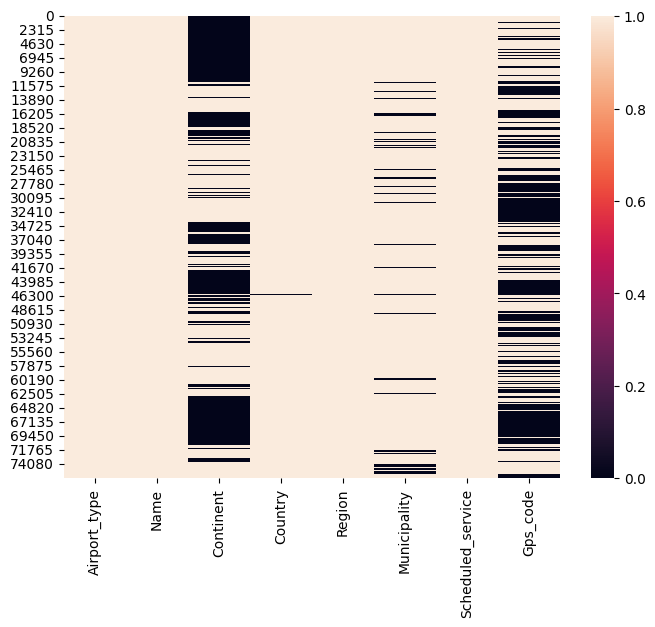

In [19]:
# Let's See Missing Values visually using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[categorical_features].notna())
plt.show()

# Exploring the Data

In [20]:
# Lets Check Missing values in Country Column
df[df['Country'].isnull()]

,id,Airport_type,Name,Latitude,Longitude,Elevation,Continent,Country,Region,Municipality,Scheduled_service,Gps_code
25749,315385,small_airport,Ai-Ais Airport,-27.995000,17.596600,2000.0,AF,NaN,NA-KA,Ai-Ais,no,FYAA
25750,29539,small_airport,Aroab B Airport,-26.776100,19.633101,3235.0,AF,NaN,NA-KA,Aroab,no,FYAB
25751,315405,small_airport,Aussenkehr Airport,-28.458700,17.464500,970.0,AF,NaN,NA-KA,Aussenkehr,no,FYAK
25752,29534,small_airport,Aminuis Airstrip,-23.655800,19.351700,4012.0,AF,NaN,NA-OH,Aminuis,no,FYAM
25753,3024,medium_airport,Arandis Airport,-22.461875,14.979322,1905.0,AF,NaN,NA-ER,Arandis,no,FYAR
...,...,...,...,...,...,...,...,...,...,...,...,...
46161,322415,small_airport,Farm Dawib Ost Landing Strip,-21.774528,15.515361,3503.0,AF,NaN,NA-ER,Hohenstein Lodge,no,NaN
46162,322416,small_airport,Farm Gurus Landing Strip,-24.076750,17.610417,4061.0,AF,NaN,NA-HA,Kalkrand,no,NaN
46163,345911,small_airport,Desert Rhino Camp Airstrip,-20.036661,13.844147,NaN,AF,NaN,NA-KU,NaN,no,NaN
46164,351688,small_airport,Namushasha River Lodge Airport,-17.983840,23.309320,3161.0,AF,NaN,NA-CA,Ngonga,no,NaN


In [21]:
# Replacing NaN values of country column with based on region
df['Country'] = df['Country'].fillna(df['Region'].str.slice(0,2))

In [22]:
df['Country'].isna().sum()

0

In [23]:
# Now Check Missing values in Country Column
df[df['Country'].isnull()]

,id,Airport_type,Name,Latitude,Longitude,Elevation,Continent,Country,Region,Municipality,Scheduled_service,Gps_code


In [24]:
df.Country.nunique()

245

In [25]:
# Airports that are Closed
df[df['Airport_type'] == 'closed']

,id,Airport_type,Name,Latitude,Longitude,Elevation,Continent,Country,Region,Municipality,Scheduled_service,Gps_code
5,6526,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN
11,6529,closed,Cass Field,40.622202,-104.344002,4830.0,NaN,US,US-CO,Briggsdale,no,NaN
13,6532,closed,Ringhaver Heliport,28.846600,-82.345398,25.0,NaN,US,US-FL,Riverview,no,NaN
20,6538,closed,Bailey Generation Station Heliport,41.644501,-87.122803,600.0,NaN,US,US-IN,Chesterton,no,NaN
40,6555,closed,Exit 3 Airport,41.590476,-84.141583,785.0,NaN,US,US-OH,Wauseon,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
76293,329802,closed,Makuti Airstrip,-16.344021,29.202102,3268.0,AF,ZW,ZW-MW,Makuti,no,NaN
76298,31259,closed,(Old) Rusape Airport,-18.533001,32.132999,4560.0,AF,ZW,ZW-MA,Rusape,no,NaN
76310,351703,closed,Mbuhulu Airstrip,-19.509961,27.408571,3370.0,AF,ZW,ZW-MN,Mbuhulu Pan,no,NaN
76358,342103,closed,Mt Logan Airstrip,60.792990,-138.694027,1997.0,NaN,CA,CA-YT,Unorganized Yukon,no,NaN


In [26]:
df.drop(df[df['Airport_type'] =='closed'].index,inplace=True)

In [27]:
df['Airport_type'].unique()

array(['heliport', 'small_airport', 'seaplane_base', 'balloonport',
       'medium_airport', 'large_airport'], dtype=object)

In [28]:
Country_counts = df.groupby('Continent')['Country'].count().reset_index()
df2 = Country_counts.sort_values(by='Country',ascending=False,ignore_index=True)
df2

,Continent,Country
0,SA,10062
1,AS,9958
2,EU,8598
3,AF,3787
4,OC,3681
5,AN,39


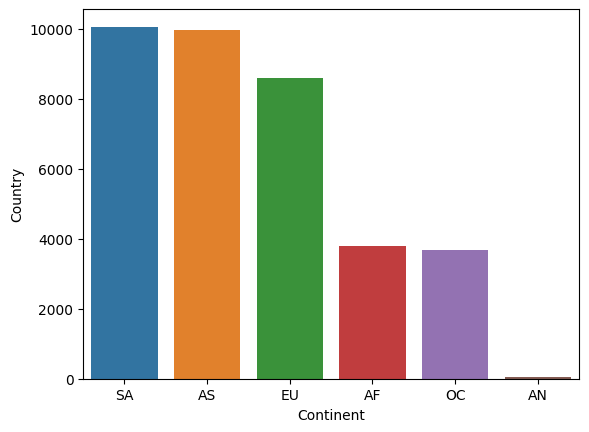

In [29]:
sns.barplot(x='Continent',y='Country',data=df2)
plt.show()

In [30]:
df[categorical_features]

,Airport_type,Name,Continent,Country,Region,Municipality,Scheduled_service,Gps_code
0,heliport,Total RF Heliport,NaN,US,US-PA,Bensalem,no,K00A
1,small_airport,Aero B Ranch Airport,NaN,US,US-KS,Leoti,no,00AA
2,small_airport,Lowell Field,NaN,US,US-AK,Anchor Point,no,00AK
3,small_airport,Epps Airpark,NaN,US,US-AL,Harvest,no,00AL
4,small_airport,Katmai Lodge Airport,NaN,US,US-AK,King Salmon,no,00AN
...,...,...,...,...,...,...,...,...
76361,medium_airport,Shenyang Dongta Airport,AS,CN,CN-21,"Dadong, Shenyang",no,ZYYY
76362,heliport,Sealand Helipad,EU,GB,GB-ENG,Sealand,no,NaN
76363,small_airport,Glorioso Islands Airstrip,AF,TF,TF-U-A,Grande Glorieuse,no,NaN
76364,small_airport,Fainting Goat Airport,NaN,US,US-TX,Blum,no,87TX


In [31]:
# Scheduled_service with respect to Airport Type
Scheduled_service = df[['Airport_type','Scheduled_service','Name','Country']]
Country_counts = Scheduled_service.groupby(['Airport_type','Scheduled_service','Country','Name']).count().reset_index()
Country_counts.sort_values(by='Airport_type',ignore_index=True)

,Airport_type,Scheduled_service,Country,Name
0,balloonport,no,AR,El Manantial Airport
1,balloonport,no,US,Characters in Flight Balloonport
2,balloonport,no,US,Clinton Elks Lodge Balloonport
3,balloonport,no,US,Cudjoe Key North TARS Site
4,balloonport,no,US,Cudjoe Key South TARS Site
...,...,...,...,...
63051,small_airport,no,GB,Dairy House Farm Airfield
63052,small_airport,no,GB,Dalkeith Farm Airstrip
63053,small_airport,no,GB,Damyns Hall Aerodrome
63054,small_airport,no,GB,Crosbie Field UL


In [32]:
# List of Countries Not Providing Scheduled_service
list(Country_counts.groupby("Scheduled_service"))[0][1].head(20)

,Airport_type,Scheduled_service,Country,Name
0,balloonport,no,AR,El Manantial Airport
1,balloonport,no,BE,Céroux-Mousty Balloon Field
2,balloonport,no,CA,High River Balloonport
3,balloonport,no,CN,Balloon Launch Facility
4,balloonport,no,DE,Balloonport Bitterfeld
5,balloonport,no,DE,Köln-Sülz Balloonport
6,balloonport,no,ES,Globedrom de Son Perot
7,balloonport,no,FR,Cérizols Balloonport
8,balloonport,no,GB,Black Horse Ballooning Club
9,balloonport,no,GB,Lydiard Park


In [33]:
# List of Countries Providing Scheduled_service
list(Country_counts.groupby("Scheduled_service"))[1][1].head(20)

,Airport_type,Scheduled_service,Country,Name
18810,heliport,yes,AF,Qara Tepa Heliport
18811,heliport,yes,BR,Banespa República Heliport
18812,heliport,yes,BR,Batalhão de Operações Aéreas do CBMSC Heliport
18813,heliport,yes,BR,Cooperativa Lar Heliport
18814,heliport,yes,BR,Eletrocity Heliport
18815,heliport,yes,BR,N. S. A. Heliport
18816,heliport,yes,BR,Sikorski Heliport
18817,heliport,yes,CA,Campbell River (E & B Heli) Heliport
18818,heliport,yes,CN,Fuzhou Zhuqi Heliport
18819,heliport,yes,EE,Tallinn Linnahall Heliport


In [34]:
Country_counts.groupby(["Airport_type",'Scheduled_service']).count().sort_index()

Country   Name
Airport_type   Scheduled_service                
balloonport    no                      48     48
heliport       no                   18762  18762
               yes                    100    100
large_airport  no                       9      9
               yes                    458    458
medium_airport no                    1957   1957
               yes                   2793   2793
seaplane_base  no                    1119   1119
               yes                     36     36
small_airport  no                   36919  36919
               yes                    855    855

In [35]:
from plotly.express import bar
bar(data_frame=df.groupby(by='Airport_type').size().to_frame().rename(columns={0: 'count'}).sort_values(ascending=False, by='count'))

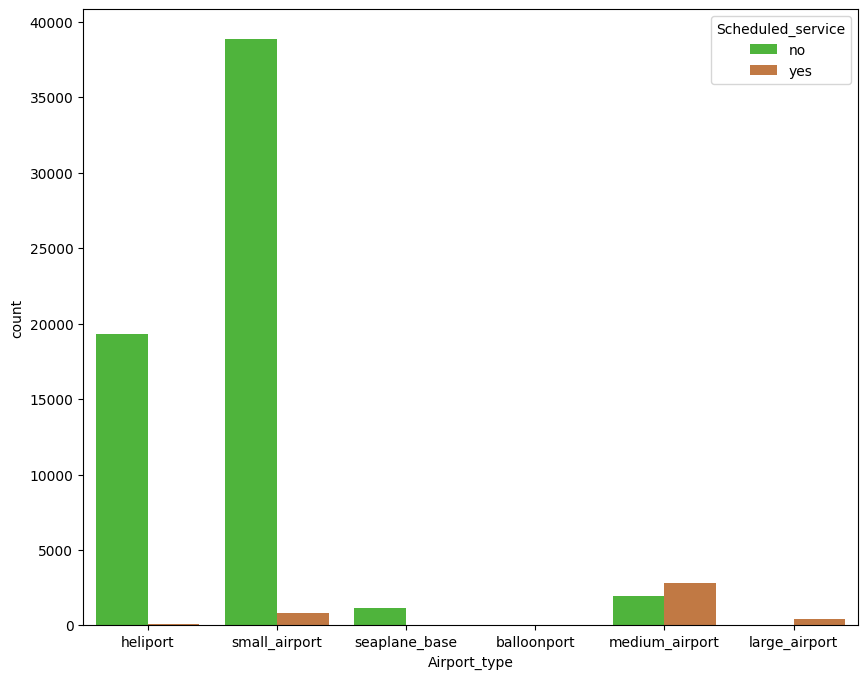

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(x='Airport_type',data=df[categorical_features],hue='Scheduled_service',palette='gist_ncar',saturation=0.5)
plt.show()

# Feature Enginnering

In [37]:
def impute_nan(df,variable,mean):
    df[variable+"_mean"]= df[variable].fillna(mean)

In [38]:
mean = df.Elevation.mean()
mean

1306.1550437945368

In [39]:
impute_nan(df,'Elevation',mean)
df.head()

,id,Airport_type,Name,Latitude,Longitude,Elevation,Continent,Country,Region,Municipality,Scheduled_service,Gps_code,Elevation_mean
0,6523,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,11.0
1,323361,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,3435.0
2,6524,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,450.0
3,6525,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,820.0
4,506791,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,80.0


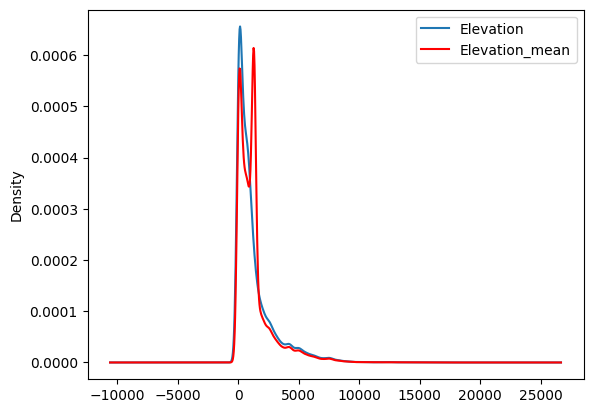

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Elevation'].plot(kind='kde',ax=ax)
df.Elevation_mean.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
plt.legend()

In [41]:
print(df['Elevation'].std())
print(df['Elevation_mean'].std())

1680.0214193639242
1523.0384010014257


In [42]:
def impute_nan(df,variable,median):
    df[variable+"_median"]= df[variable].fillna(median)

In [43]:
median = df.Elevation.median()
median

735.0

In [44]:
impute_nan(df,'Elevation',median)
df.head()

,id,Airport_type,Name,Latitude,Longitude,Elevation,Continent,Country,Region,Municipality,Scheduled_service,Gps_code,Elevation_mean,Elevation_median
0,6523,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,11.0,11.0
1,323361,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,3435.0,3435.0
2,6524,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,450.0,450.0
3,6525,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,820.0,820.0
4,506791,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,80.0,80.0


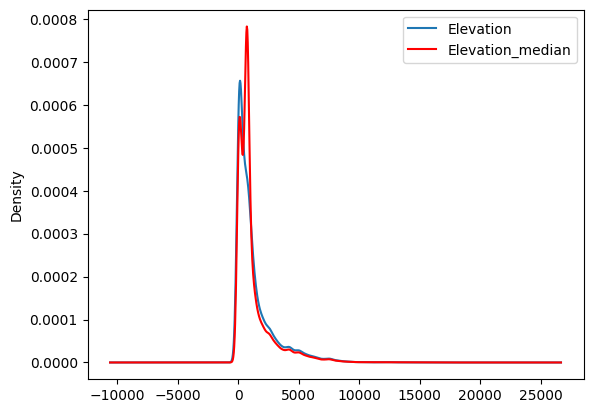

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Elevation'].plot(kind='kde',ax=ax)
df.Elevation_median.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
plt.legend()
plt.show()

In [46]:
print(df['Elevation'].std())
print(df['Elevation_median'].std())

1680.0214193639242
1538.638604109434


In [47]:
df['Elevation'].dropna().sample()


70939    10.0
Name: Elevation, dtype: float64

In [48]:
df['Elevation'].isnull().sum()

11681

In [49]:
df['Elevation'].dropna().sample(df['Elevation'].isnull().sum(),random_state=0) # replacing NAN values with random numbers

2502      651.0
39273     771.0
63676     115.0
37251     881.0
14953     292.0
          ...  
25421      30.0
18348     223.0
75725    1500.0
60319    2050.0
64269    1912.0
Name: Elevation, Length: 11681, dtype: float64

In [50]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ## it will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df['Elevation'].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [51]:
median = df.Elevation.median()
median

735.0

In [52]:
impute_nan(df,'Elevation',median)

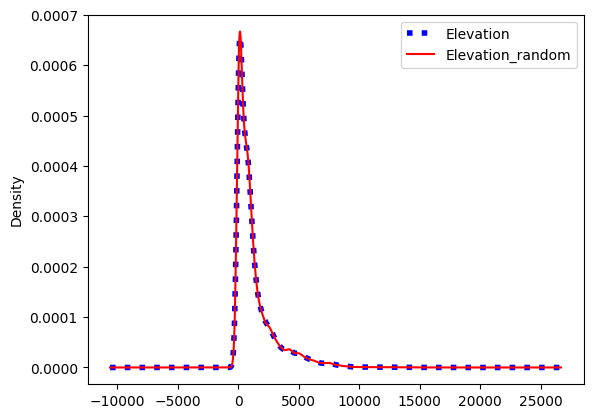

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Elevation'].plot(kind='kde',ax=ax,color='b',linewidth=4,linestyle=':')
#df.elevation_ft_median.plot(kind='kde',ax=ax,color='red')
df.Elevation_random.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
plt.legend()

In [54]:
df.isna().sum()

id                       0
Airport_type             0
Name                     0
Latitude                 0
Longitude                0
Elevation            11681
Continent            29444
Country                  0
Region                   0
Municipality          4455
Scheduled_service        0
Gps_code             24224
Elevation_mean           0
Elevation_median         0
Elevation_random         0
dtype: int64

<Axes: >

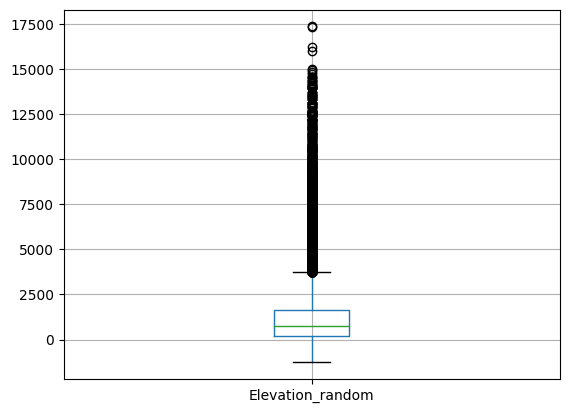

In [55]:
df.boxplot(column='Elevation_random')

/tmp/ipykernel_20/1646862293.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




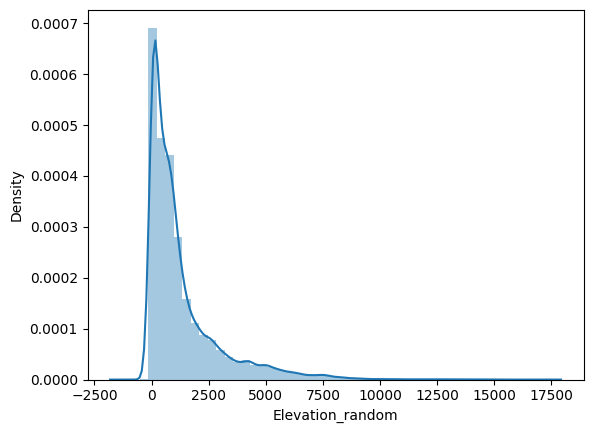

In [56]:
sns.distplot(df['Elevation_random'].dropna())
plt.show()

In [57]:
df['Elevation_random'].describe()

count    65569.000000
mean      1304.661791
std       1677.874299
min      -1266.000000
25%        210.000000
50%        735.000000
75%       1620.000000
max      17372.000000
Name: Elevation_random, dtype: float64

In [58]:
### Lets compute the Interquantile range to calculate the boundries
IQR = df.Elevation_random.quantile(0.75)-df.Elevation_random.quantile(0.25) 
IQR

1410.0

In [59]:
upper_boundary = df['Elevation_random'].mean() + 3* df['Elevation_random'].std()
lower_boundary = df['Elevation_random'].mean() - 3* df['Elevation_random'].std()
print('Lower Boundary : ',lower_boundary),print('Upper Boundary : ',upper_boundary),print('Mean :',df['Elevation'].mean())

Lower Boundary :  -3728.9611062898757
Upper Boundary :  6338.284689080524
Mean : 1306.1550437945368


(None, None, None)

In [60]:
lower_bridge = df['Elevation_random'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Elevation_random'].quantile(0.75) + (IQR*1.5)
print('Lower Bridge : ',lower_bridge),print('Upper Bridge : ',upper_bridge)

Lower Bridge :  -1905.0
Upper Bridge :  3735.0


(None, None)

In [61]:
# Extreme outliers

lower_bridge = df['Elevation_random'].quantile(0.25) - (IQR*3)
upper_bridge = df['Elevation_random'].quantile(0.75) + (IQR*3)
print(lower_bridge),print(upper_bridge)

-4020.0
5850.0


(None, None)

In [62]:
data = df.copy()

In [63]:
data.loc[data['Elevation_random']>5850].shape

(1950, 15)

In [64]:
data.loc[data['Elevation_random']>5850,'Elevation_random'] = 5850

<Axes: >

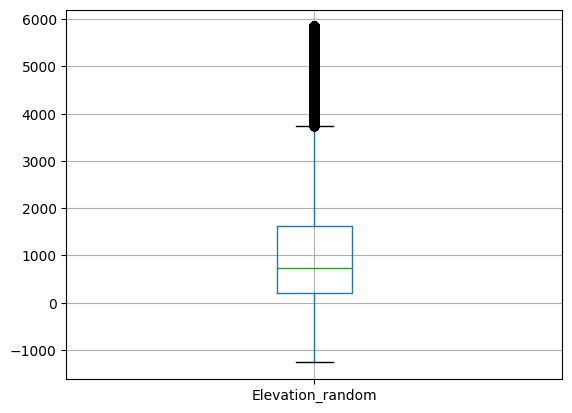

In [65]:
data.boxplot(column='Elevation_random')

/tmp/ipykernel_20/44423360.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




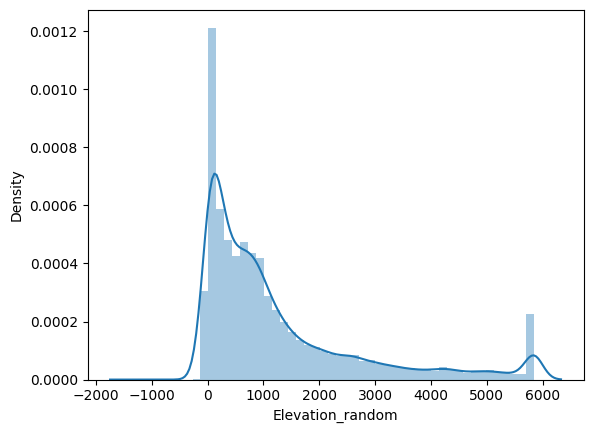

In [66]:
sns.distplot(data['Elevation_random'])
plt.show()

Text(0, 0.5, 'Height')

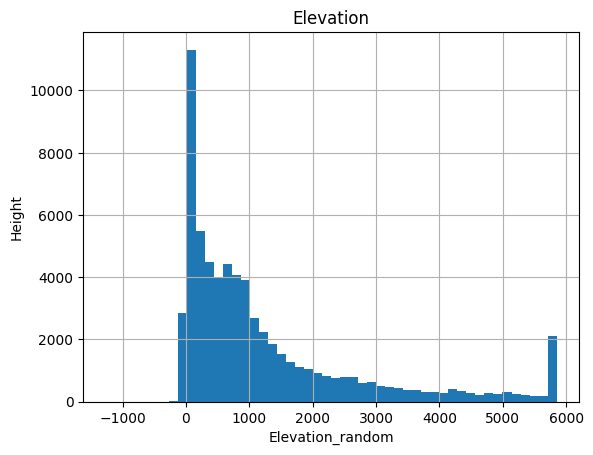

In [67]:
figure = data.Elevation_random.hist(bins=50)
figure.set_title('Elevation')
figure.set_xlabel('Elevation_random')
figure.set_ylabel('Height')

In [68]:
# to be countined